In [ ]:
void dfs(int node, int vis[], vector<int> &al){
  if(vis[node]){
    return;
  } 
  vis[node]=1;
  for(int x: al[node]){
    dfs(x);
  } 
}

In [ ]:
bool isValid(int r, int c , int rr, int cc){
	return r>=0 and r<rr and c>=0 and c<cc;	
}

In [ ]:
void dfs(int r, int c, vector<vector<int>> &vis){
    if(!isValid(r,c)){
        return;
    }
    if(vis[r][c]){
        return;
    } 
    //this sequential order is important
    vis[r][c]=1;
    for(int dir: directions){
        dfs(r+dir[0],c+dir[1]);
    } 
  }

# No. of components

In [ ]:
int ans=0;
vector<int> vis(n,0);
for(int i=0;i<n;i++){
    if(vis[i]){
        continue;
    } 
    ans++;
    dfs(i,al,vis);
}

void dfs(int node, vector<int> al[], vector<int> &visited){
    visited[node]=1;
    for(int i=0;i<al[node].size();i++){
        if(visited[al[node][i]]){
            continue;
        } 
        dfs(al[node][i],al,visited);
    }
}


# No of components with isConnected    
https://leetcode.com/problems/number-of-provinces/    
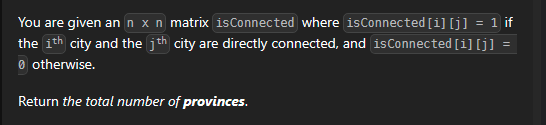

In [ ]:
void dfs(int node, vector<int> al[], vector<int> &visited){
    visited[node]=1;
    for(int i=0;i<al[node].size();i++){
        if(visited[al[node][i]]) continue;
        dfs(al[node][i],al,visited);
    }
}


int findCircleNum(vector<vector<int>>& ma) {
    int n= ma.size();
    vector<int> al[n];
    for(int i=0;i<n;i++){
        for(int j=0;j<n;j++){
            if(ma[i][j]==1 and i!=j){
                al[i].push_back(j);
                al[j].push_back(i);
            }
        }
    }   

    vector<int> vis(n,0);
    int ans=0;
    for(int i=0;i<n;i++){
        if(vis[i]){
            continue;
        } 
        ans++;
        dfs(i,al,vis);

        return ans; 
    }
}


# Max area of island    
if any island area exceed m*n//2, this is your answer   
https://leetcode.com/problems/max-area-of-island/description/

In [ ]:
bool isValid(int r, int c, int rr, int cc){
    return r>=0 and r<rr and c>=0 and c<cc;
}


void getArea(int r, int c, vector<vector<int>>& ma, int &ans,int rr, int cc, vector<pair<int,int>> &directions){
    if(!ma[r][c]) return;
    ma[r][c]=0;
    ans++;
    for(int i=0;i<directions.size();i++){
        int tr=r+directions[i].first,tc=c+directions[i].second;
        if(!isValid(tr,tc,rr,cc)) continue;
        getArea(tr,tc,ma,ans,rr,cc,directions);
    }
}

int maxAreaOfIsland(vector<vector<int>>& ma) {
    vector<pair<int,int>> directions={{0,-1},{0,1},{-1,0},{1,0}};
    int maxx=0;
    int rr=ma.size(),cc=ma[0].size();
    for(int i=0;i<rr;i++){
        for(int j=0;j<cc;j++) if(ma[i][j]==1){
            int ans=0;
            getArea(i,j,ma,ans,rr,cc,directions);
            if(ans>=(rr*cc)/2) return ans;
            maxx=max(maxx,ans);
        } 
    }
    return maxx;


}

Perimeter of a single island in a matrix   
https://leetcode.com/problems/island-perimeter/description/

In [ ]:

bool isValid(int r, int c, int rr, int cc){
    return r>=0 and r<rr and c>=0 and c<cc;
}

void dfs(int r, int c, vector<vector<int>>& ma, int &ans){
    int rr=ma.size(),cc=ma[0].size();
    vector<pair<int,int>> directions={{0,-1},{0,1},{-1,0},{1,0}};
    ma[r][c]=-1;
    for(int i=0;i<directions.size();i++){
        int tr=r+directions[i].first,tc=c+directions[i].second;
        if(!isValid(tr,tc,rr,cc) or ma[tr][tc]==0){
            ans++;
            continue;
        } 
        if(ma[tr][tc]==-1) continue;
        dfs(tr,tc,ma,ans);
    }
}

int islandPerimeter(vector<vector<int>>& ma) {
    int ans=0;
    for(int i=0;i<ma.size();i++){
        for(int j=0;j<ma[0].size();j++) if(ma[i][j]==1) dfs(i,j,ma,ans);
    }
    return ans;
}

Flood Fill    
https://leetcode.com/problems/flood-fill/description/

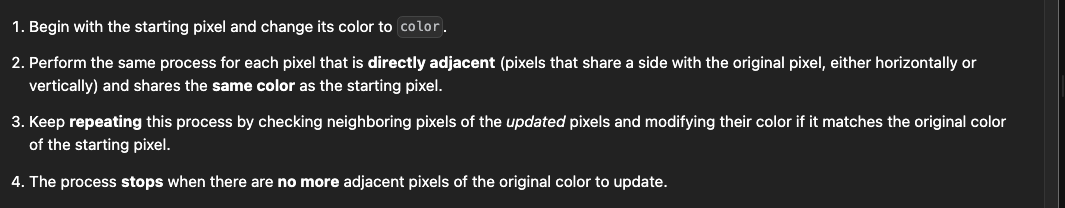

In [ ]:
bool isValid(ll r, ll c , ll rr, ll cc){
    return r>=0 and r<rr and c>=0 and c<cc;	
}

void dfs(int r, int c, vector<vector<int>>& ma, int rr, int cc, vector<vector<int>> &dir, int color, int initColor){
    if(ma[r][c]!=initColor) return;
    ma[r][c]=color;
    for(auto v: dir){
        int tr=r+v[0],tc=c+v[1];
        if(!isValid(tr,tc,rr,cc)) continue;
        dfs(tr,tc,ma,rr,cc,dir,color, initColor);
    }
}


vector<vector<int>> floodFill(vector<vector<int>>& ma, int ix, int iy, int color) {
    vector<vector<int>> dir={{1,0},{-1,0},{0,1},{0,-1}};
    int rr=ma.size(),cc=ma[0].size();
    int initColor=ma[ix][iy];
    if(color!=initColor) dfs(ix,iy,ma,rr,cc,dir,color, initColor);
    return ma;
}   